In [1]:
from sklearn.datasets import load_boston

In [5]:
X, y = load_boston(return_X_y=True)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X, y)
model.predict(X)

array([21.78, 22.9 , 25.36, 26.06, 27.1 , 27.1 , 20.88, 19.1 , 18.4 ,
       19.48, 19.28, 22.  , 24.34, 20.52, 24.66, 21.3 , 30.48, 20.4 ,
       15.7 , 23.54, 16.82, 17.64, 18.3 , 17.08, 16.66, 15.1 , 16.78,
       14.94, 19.94, 18.34, 14.1 , 16.82, 15.12, 14.1 , 15.12, 26.92,
       22.14, 27.4 , 28.44, 31.88, 31.88, 25.36, 25.36, 24.22, 20.68,
       20.44, 20.44, 18.1 , 18.1 , 24.  , 21.54, 24.  , 27.16, 27.16,
       25.7 , 39.82, 27.08, 38.28, 24.8 , 25.64, 21.78, 33.6 , 21.78,
       24.06, 31.74, 25.3 , 26.98, 22.18, 20.42, 20.42, 27.76, 29.5 ,
       27.76, 27.76, 22.92, 21.64, 25.82, 21.64, 21.38, 22.02, 24.8 ,
       21.88, 25.22, 25.64, 25.98, 25.98, 23.28, 25.98, 24.02, 25.58,
       25.58, 25.06, 26.34, 26.04, 30.1 , 24.84, 23.62, 24.32, 28.52,
       24.96, 22.1 , 22.2 , 15.34, 19.74, 19.74, 19.66, 19.56, 21.34,
       19.66, 19.56, 22.08, 20.1 , 19.6 , 17.54, 20.1 , 17.7 , 20.2 ,
       20.1 , 20.66, 19.8 , 22.76, 20.6 , 19.66, 18.52, 19.66, 20.6 ,
       18.52, 16.62,

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [9]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [10]:
model = KNeighborsRegressor().fit(X, y)
predict = model.predict(X)

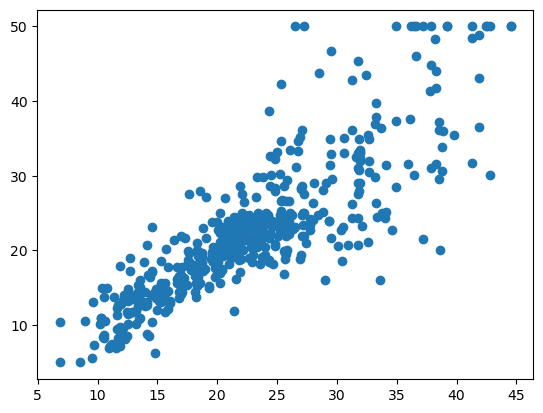

In [14]:
plt.scatter(predict, y)
plt.show()

# Pipeline with Scale

In [15]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

In [21]:
pipeline.fit(X, y)
predict = pipeline.predict(X)

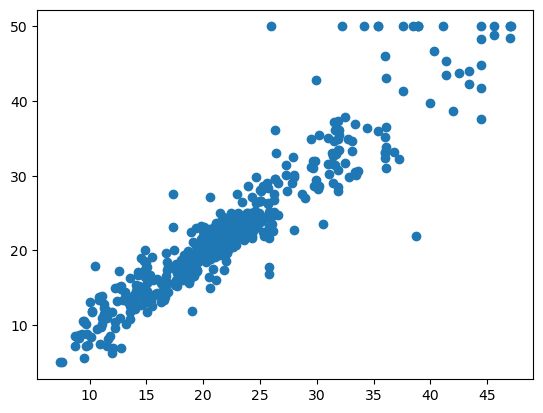

In [22]:
plt.scatter(predict, y)
plt.show()

## K-nearest neighbors with 1 nearest neighbor instead of 5

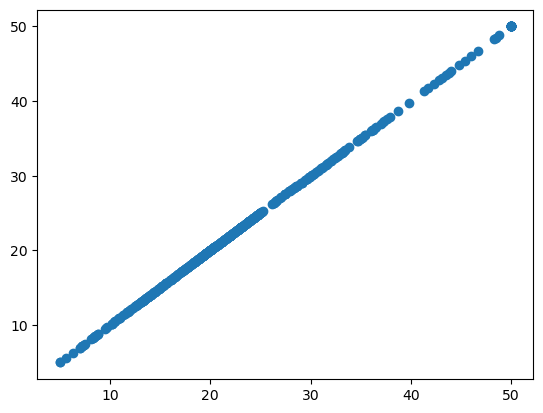

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=1).fit(X, y))
])

pipeline.fit(X, y)
predict = pipeline.predict(X)

plt.scatter(predict, y)
plt.show()

# Grid Search

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=1))
])

pipe.get_params() # This function is in every scikit-learn estimator which has `.fit()` and `.predict()` functions.

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [35]:
model = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, 
             cv=3) # Cross Validation

In [36]:
model.fit(X, y)
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001714,0.000606,0.001900,0.000211,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001266,0.000087,0.002339,0.000854,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001584,0.000040,0.002362,0.000317,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001283,0.000097,0.001917,0.000058,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001082,0.000022,0.001792,0.000146,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001035,0.000016,0.001725,0.000119,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001016,0.000002,0.001770,0.000117,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001032,0.000018,0.001806,0.000148,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001018,0.000005,0.001862,0.000103,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001025,0.000024,0.001840,0.000137,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
